In [76]:
import pandas as pd
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt


In [77]:

sql = """
select count(p.cidpri) as casos,ANY_VALUE(pc.descr) as doenca_primaria, ANY_VALUE(p.dt_atend)
from main.psicossocial p
inner join main.s_cid pc on p.cidpri = pc.codigo
WHERE p.ufmun = '431020' and p.dt_atend like '2014%'
group by p.cidpri
order by casos
desc
limit 5
"""

sql = """
select pc.descr, p.dt_atend, count(p.cidpri) as count
from main.psicossocial p
inner join main.s_cid pc on p.cidpri = pc.codigo 
WHERE p.ufmun = '431020' and pc.descr like '%F10 %'
group by p.dt_atend, pc.descr 
    """

conn = duckdb.connect("database/database_pi.db")
rows = conn.query(sql).fetchall()
conn.close()

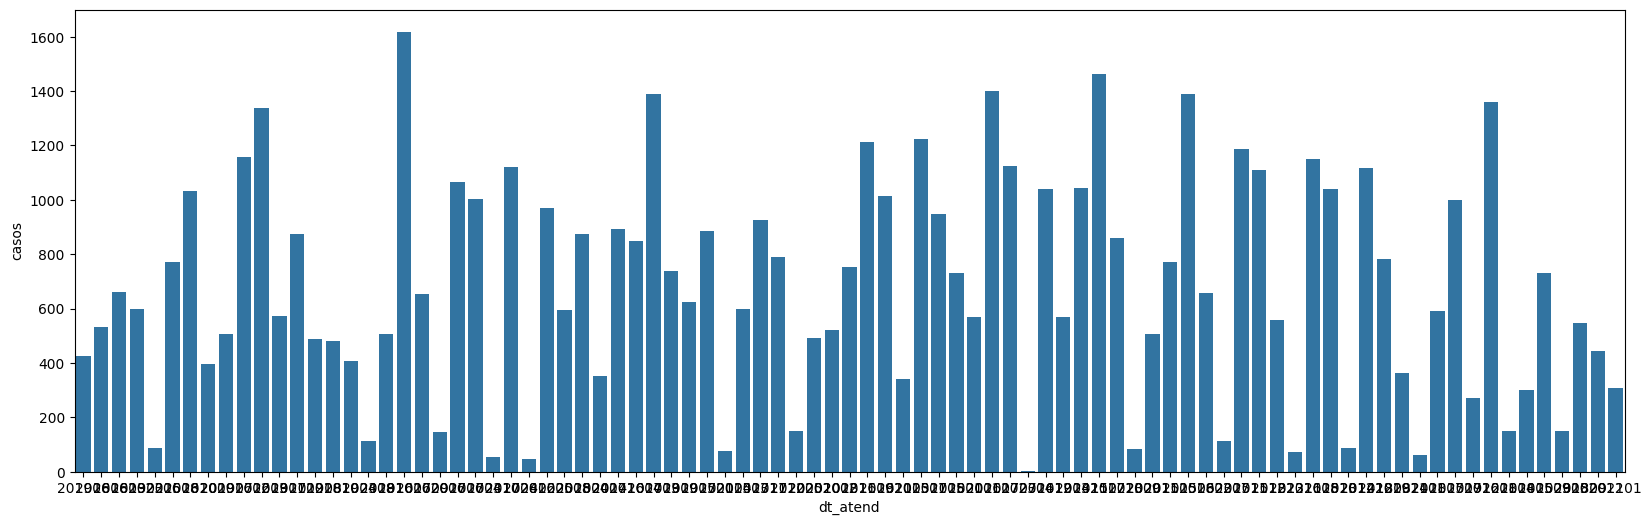

In [81]:
dataframe = pd.DataFrame(rows,columns=["descricao", "dt_atend", "casos"])

dataframe.to_csv("kabooom.csv")
f, ax = plt.subplots(figsize=(20, 6))
grafico = sns.barplot(data=dataframe, x="dt_atend", y="casos")